[0, 135.355, 220.22, 307.205, 366.805, 428.895, 474.345, 509.32, 544.615, 577.1, 606.985, 636.045, 659.81, 678.35, 699.355, 719.95, 737.465, 751.28, 766.77, 778.42, 792.845, 803.475, 812.545, 821.26, 829.63, 839.735, 849.385, 858.425, 866.095, 873.335, 882.375, 888.765, 894.815, 900.71, 905.965, 912.16, 917.595, 922.195, 927.705, 933.325, 938.33, 942.395, 947.385, 951.905, 957.54, 961.945, 966.065, 969.91, 974.305, 977.815, 981.41, 985.93, 989.46, 993.295, 996.685, 1000.005, 1004.155, 1007.575, 1010.895, 1014.63, 1018.355, 1022.305, 1025.73, 1028.46, 1031.625, 1034.45, 1037.225, 1040.95, 1043.9, 1046.81, 1050.195, 1053.535, 1056.53, 1059.195, 1062.53, 1065.45, 1068.63, 1071.13, 1073.795, 1076.33, 1079.325, 1082.015, 1084.655, 1087.29, 1090.23, 1093.445, 1096.035, 1098.585, 1101.54, 1104.325, 1106.985, 1109.435, 1112.365, 1115.095, 1117.73, 1120.3, 1123.015, 1125.425, 1127.935, 1130.665, 1133.095, 1135.43, 1138.065, 1140.525, 1142.9, 1145.025, 1147.75, 1150.345, 1153.08, 1155.345, 1157.

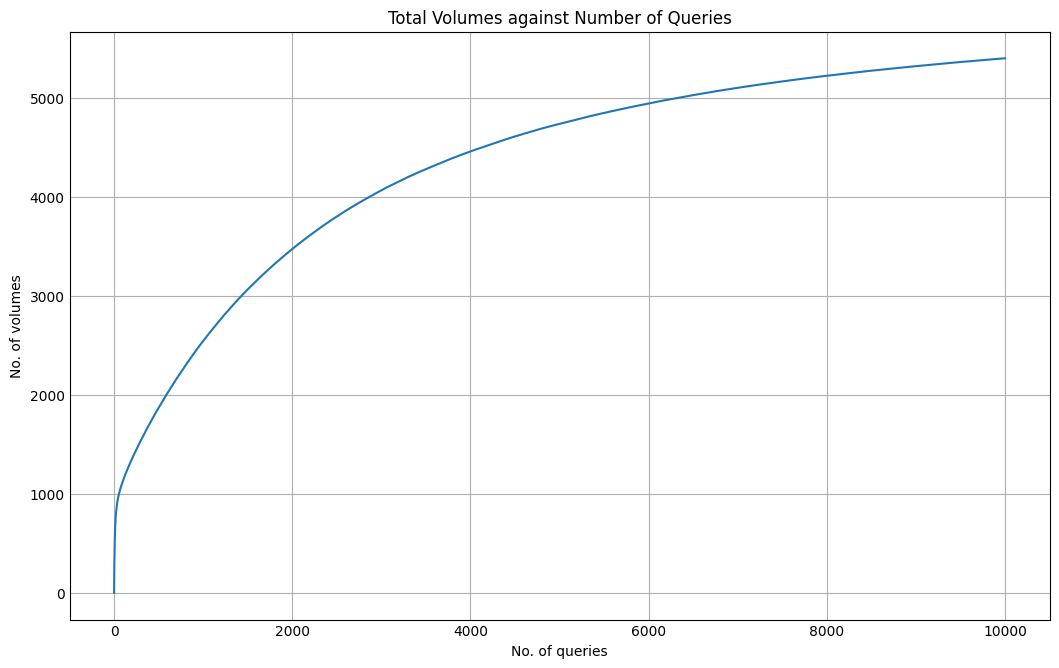

In [9]:
import math 
import random 
import matplotlib.pyplot as plt 

RSEmax = 2048

query_range_list = []
for i in range (RSEmax):
    for j in range (i+1):
        query_range_list.append(j)

def query_gen():
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)


def cover_log(start_int, end_int):
    c = 0
    query_list = []
    while start_int <= end_int:
        c = start_int
        for i in range(2, int(math.log(RSEmax, 2))+1):
            if end_int == start_int + 1:
                c = end_int
                break
            if start_int % 2 == 0:
                if end_int - start_int < 4:
                    c = start_int + 1
                    break
                else:
                    c = start_int
                    break
            if start_int + (2**i -1) > end_int:
                break
            else:    
                c = start_int + (2**i -1)
            if start_int % 2**(i-1) != 1:
                c = start_int + (2**(i-1) -1)
                break   
      
        node = (start_int, c)
        query_list.append(node)
        start_int = c+1
    return query_list

max_volumes = 3*RSEmax - (math.log(RSEmax, 2)+2)
no_of_runs = 200
no_of_queries = 10000
def log_query(no_of_runs,no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        query_tracker = []
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                for i in range(int((RSEmax*(RSEmax + 1))/2), no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            else:
                query_tracker.append(query_asked)
                (a,b) = query_asked
                query_list = cover_log(a,b)
                for i in query_list:
                    if i not in vol_tracker:
                        vol_tracker.append(i)
                        vol_sum +=1
                arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    return(arr)

arr = log_query(no_of_runs,no_of_queries) 

print(arr)

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()